In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [2]:
temperature = [30,32,31,28,29,35,32,30,28,24,22,30,31,32,28,30,32,31,28,29,35,32,30,28,24,22,30,31,32,28]

In [3]:
data = np.array(temperature, dtype = 'float32' )
data = data/max(data)

In [4]:
data

array([0.85714287, 0.9142857 , 0.8857143 , 0.8       , 0.82857144,
       1.        , 0.9142857 , 0.85714287, 0.8       , 0.6857143 ,
       0.62857145, 0.85714287, 0.8857143 , 0.9142857 , 0.8       ,
       0.85714287, 0.9142857 , 0.8857143 , 0.8       , 0.82857144,
       1.        , 0.9142857 , 0.85714287, 0.8       , 0.6857143 ,
       0.62857145, 0.85714287, 0.8857143 , 0.9142857 , 0.8       ],
      dtype=float32)

In [5]:
x,y =[],[]
window_size = 5

for i in range (len(data) - window_size):
    x.append(data[i:i + window_size])
    y.append(data[i + window_size])

x = np.array(x)
y = np.array(y)

x = x.reshape((x.shape[0],x.shape[1],1))

In [6]:
model = Sequential([
    LSTM(32,input_shape = (window_size,1)),
    Dense(1)
])

c:\Users\AnayJoshi28\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics = ['accuracy']
)

In [8]:
model.fit(x,y,epochs = 100,verbose = 0)

In [10]:
loss, accuracy = model.evaluate(x,y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.0800 - loss: 0.0122


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


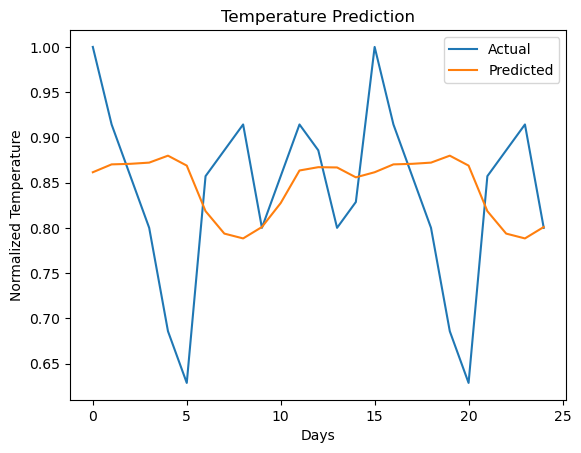

In [9]:
# Predict next temperature
predicted = model.predict(x)

plt.plot(y, label='Actual')
plt.plot(predicted, label='Predicted')
plt.legend()
plt.title('Temperature Prediction')
plt.xlabel('Days')
plt.ylabel('Normalized Temperature')
plt.show()
